<a href="https://www.kaggle.com/code/yannicksteph/rsna-miccai-brain-tumor-classification?scriptVersionId=131154173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/yannicksteph/rsna-miccai-brain-tumor-classification" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚧 Work in progress 🚧

**<center><font size=5>RSNA-MICCAI Brain Tumor Classification</font></center>**

<center><img src="https://lingualab.ca/fr/project/language-recovery-psa/featured_hu67ab33455cf328a3b8dbb37d23762824_484672_720x0_resize_lanczos_2.png" alt="equal-2495950-1920" border="0" width="700"></center>

***

**Table of Contents**
- <a href='#overview'>1. Project overview and objectives</a> 
    - <a href='#contributors'>1.1. Contributors</a>
    - <a href='#dataset_overview'>1.2. Data overview</a>
    - <a href='#definitions'>1.3. Imports, Methods, Paths, Reading definitions</a>
- <a href='#exploratory_data'>2. Exploratory Data</a>
- <a href='#brain_segmentation'>3. Brain segmentation</a>
    - <a href='#brain_segmentation_3_1'>3.1. Importance of Brain Segmentation</a>
    - <a href='#brain_segmentation_3_2'>3.2. Selection Criteria</a>
    - <a href='#brain_segmentation_3_3'>3.3. Contributions of the Library</a>
    - <a href='#brain_segmentation_3_4'>3.4. Conclusion</a>
- <a href='#utilizing_unet_4'>4. Utilizing the U-Net for Brain MRI Model and RadiomicsShape2D Class</a>
    - <a href='#utilizing_unet_4_1'>4.1. Architecture</a>
    - <a href='#utilizing_unet_4_2'>4.2. Usage Instructions</a>
    - <a href='#utilizing_unet_4_3'>4.3. RadiomicsShape2D Class</a>
    - <a href='#utilizing_unet_4_4'>4.4. Usage Instructions</a>
- <a href='#dataset_creation_5'>5. Dataset creation</a>
- <a href='#exploratory_dataset'>6. Exploratory Dataset</a>

# 🚧 TODO TEAM ADD OTHER SECTION ⚠️

***

# <a id='overview'>1. Project overview and objectives</a>

### Overview:

A malignant brain tumor is a life-threatening condition, specifically glioblastoma, which is the most common and has the poorest prognosis among adult brain cancers, with a median survival of less than a year. The presence of a specific genetic sequence called MGMT promoter methylation in the tumor has been identified as a favorable prognostic factor and a strong predictor of chemotherapy responsiveness.

Currently, the genetic analysis of cancer requires a surgical procedure to obtain a tissue sample, followed by a time-consuming process of determining the genetic characteristics of the tumor, which can take several weeks. Depending on the results and the chosen initial treatment, additional surgeries may be necessary. Developing an accurate method to predict the genetic profile of the cancer solely through imaging (known as radiogenomics) would potentially reduce the number of surgeries and allow for a more tailored therapy approach.

The Radiological Society of North America (RSNA) and the Medical Image Computing and Computer Assisted Intervention Society (MICCAI Society) have collaborated to enhance the diagnosis and treatment planning for glioblastoma patients.

### Competition:

In this competition, participants are tasked with using MRI (magnetic resonance imaging) scans to train and test a model that can predict the genetic subtype of glioblastoma by detecting the presence of MGMT promoter methylation.

Successful outcomes from this competition could significantly contribute to less invasive diagnoses and treatments for brain cancer patients. Introducing new and personalized treatment strategies before surgery holds the potential to improve the management, survival rates, and overall prospects of individuals affected by brain cancer.

### Acknowledgments:

The Radiological Society of North America (RSNA®) is a non-profit organization representing 31 radiologic subspecialties from 145 countries worldwide. RSNA promotes excellence in patient care and healthcare delivery through education, research, and technological innovation.

RSNA provides high-quality educational resources, publishes five top peer-reviewed journals, hosts the world's largest radiology conference, and is dedicated to shaping the future of the profession through the RSNA Research & Education (R&E) Foundation, which has funded $66 million in grants since its establishment. Additionally, RSNA actively supports and facilitates research in medical imaging artificial intelligence (AI) by sponsoring ongoing AI challenge competitions.

The Medical Image Computing and Computer Assisted Intervention Society (MICCAI Society) is committed to advancing research, education, and practice in the field of medical image computing, computer-assisted interventions, biomedical imaging, and medical robotics. The society achieves this objective by organizing high-quality international conferences, workshops, tutorials, and publications that promote the exchange and dissemination of advanced knowledge, expertise, and experiences produced by leading institutions, scientists, physicians, and educators worldwide.

A complete list of acknowledgments can be found on this page.

[RSNA-MICCAI Brain Tumor Radiogenomic Classification](https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/data?select=train_labels.csv)

## <a id='contributors'>1.1. Contributors</a>

- [David Goudard](https://www.kaggle.com/goudgoud)
- [Louis-Marie Renaud](https://www.kaggle.com/louismarierenaud)
- [Yannick Stephan](https://github.com/YanSteph)

## <a id='dataset_overview'>1.2. Data overview</a>

The dataset we will be working with consists of MRI data provided by the Radiological Society of North America (RSNA®) and the Medical Imaging Computation and Computer Assistance Society (MICCAI Society). The images are provided in DICOM format and are accompanied by a CSV file containing radiomic features extracted from the images.

The **"train/"** directory contains the training files with the **"train_labels.csv"**

The **"test/"** directory contains the tests files for the competition with the **"sample_submission.csv"**

The files are mpMRI scans, this includes:
- Fluid Attenuated Inversion Recovery (FLAIR)
    * What it is: These are images that detect brain abnormalities, such as edema and inflammatory lesions. These images are sensitive to the detection of anomalies related to inflammatory and infectious diseases of the central nervous system.
    * What it highlights: It helps to detect anomalies in the brain that might not be visible in other MRI sequences.
    * These images allow for the detection of brain abnormalities related to inflammatory and infectious diseases of the central nervous system.
- T1-weighted pre-contrast (T1w)
    * What it is: These are images that highlight soft tissues, such as muscles and nerves, and are useful for visualizing normal brain structures.
    * What it highlights: It allows the visualization of the normal brain structures and also helps in the detection of tumors and lesions.
    * These images allow for the detection of brain tumors and lesions.
- T1-weighted post-contrast (T1Gd)
    * What it is: These are images that use a contrast agent to detect vascular anomalies, such as tumors and lesions, which are more visible after contrast agent administration.
    * What it highlights: It enhances the visibility of vascular anomalies, such as tumors and lesions, making it easier to detect them.
    * These images allow for the detection of vascular anomalies, such as tumors and lesions.
- T2-weighted (T2)
    * What it is: These images detect abnormalities related to demyelination, such as multiple sclerosis, as well as brain tumors and lesions.
    * What it highlights: It helps in the detection of anomalies related to cerebrospinal fluid, such as cysts and brain tumors.
    * These images allow for the detection of anomalies related to demyelination, brain tumors, lesions, and cerebrospinal fluid.

## <a id='definitions'>1.3. Imports, Methods, Paths, Reading definitions</a>

### Imports

In [ ]:
# Operating System and File System
import os 

# Data Manipulation and Analysis
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Warnings
import warnings  # For suppressing warnings

# JSON Handling
import json  # For working with JSON data

# Encoding and Decoding Binary Data
import base64  # For encoding and decoding binary data

# Interactive Widgets and Display
import ipywidgets as widgets  # For creating interactive widgets in Jupyter Notebook
from IPython.display import HTML, display  # For displaying HTML content

# Deep Learning Framework
import torch  # For working with PyTorch deep learning framework

# DICOM File Handling
import pydicom  # For reading DICOM files
from pydicom import dcmread  # For reading DICOM files

# Image Processing and Filtering
import SimpleITK as sitk  # For image filtering
from PIL import Image  # For image processing using the Python Imaging Library (PIL)

# Machine Learning and Data Splitting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

# Additional Libraries
!pip install pyradiomics > /dev/null  # Installing the pyradiomics library for radiomics feature extraction
import radiomics  # For extracting radiomics features from medical images

### Configure

In [ ]:
# ------------
# Configuration
# ------------

# Show all columns
pd.set_option('display.max_columns', None)
# Suppressing Warnings
warnings.filterwarnings('ignore')

# Define "reader"
# Read serie of image files into a SimpleTK image
sitk_reader = sitk.ImageSeriesReader()
sitk_reader.LoadPrivateTagsOn()

# ------------
# Paths
# ------------

path_rsna_brain_tumor_classification = "../input/rsna-miccai-brain-tumor-radiogenomic-classification/"

train_path = path_rsna_brain_tumor_classification + "train/"
train_label_file = path_rsna_brain_tumor_classification + '/train_labels.csv'

# @TODO define path like genere
path = "../input/rsna-miccai-brain-tumor-segmentation-pytorch-unet/"
dataset_path = "/kaggle/input/rsna-miccai-brain-tumor-segmentation-pytorch-unet/rsna_miccai_brain_tumor_brain_segmentation_pytorch_unet.csv"
#path + "rsna_miccai_brain_tumor_brain_segmentation_pytorch_unet.csv/"

# ------------
# Segmentation
# ------------

# Load mateuszbuda/brain-segmentation-pytorch, U-Net with batch normalization for biomedical image segmentation with pretrained weights for abnormality segmentation in brain MRI
segmentation_model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 
                                    'unet', 
                                    in_channels=3, 
                                    out_channels=1, 
                                    init_features=32, 
                                    pretrained=True, 
                                    trust_repo=False)

# ------------
# Dataset
# ------------

# Dataset of the project, explanation in next section.
dataset = pd.read_csv(train_label_file)
samp_subm = pd.read_csv(path_rsna_brain_tumor_classification + 'sample_submission.csv')

👆 Repository *mateuszbuda_brain-segmentation-pytorch*  will ask permission, tap *y*.

### Methods

In [ ]:
# ===============================================
# Images methods
# ===============================================

def get_processed_image(patient_id):
    """
    Retrieves and processes the images for a given patient, grouping them for segmentation.

    Args:
        patient_id (str): The ID of the patient (BraTS21ID).

    Returns:
        numpy.ndarray: A processed image composed of the different images of the patient.
    """
    # SEGMENTATION MODEL LIMITED TO 3 LAYERS
    # T2W SKIPPED

    # Paths for image sequences
    t1w_path = f'{train_path}/{str(patient_id).zfill(5)}/T1w'
    flair_path = f'{train_path}/{str(patient_id).zfill(5)}/FLAIR'
    t1wce_path = f'{train_path}/{str(patient_id).zfill(5)}/T1wCE'
    #t2w_path = f'{train_path}/{str(patient_id).zfill(5)}/T2w'

    # Retrieve image sequences
    t1w_image = sequence_filenames(t1w_path)
    flair_image = sequence_filenames(flair_path)
    t1wce_image = sequence_filenames(t1wce_path)
    #t2w_image = sequence_filenames(t2w_path)

    # Resampling
    re_sampled_flair = re_sample_image(flair_image, t1w_image)
    re_sampled_t1wce = re_sample_image(t1wce_image, t1w_image)
    #re_sampled_t2w = re_sample_image(t2w_image, t1w_image)

    # Normalization
    t1w_array = normalize(sitk.GetArrayFromImage(t1w_image))
    flair_array = normalize(sitk.GetArrayFromImage(re_sampled_flair))
    t1wce_array = normalize(sitk.GetArrayFromImage(re_sampled_t1wce))
    #t2w_array = normalize(sitk.GetArrayFromImage(re_sampled_t2w))

    sequence_stacked = np.stack([t1w_array, flair_array, t1wce_array]) #, t2w_array])

    central_slice = t1w_array.shape[0] // 2
    rvb = sequence_stacked[:, central_slice, :, :].transpose(1, 2, 0)
    image = Image.fromarray((rvb * 255).astype(np.uint8))
    return np.array([np.moveaxis(np.array(image.resize((256, 256))), -1, 0)])


def sequence_filenames(path) :
    """
    Retrieves a sequence of images for a given directory.

    Args:
        path (str): The path to the directory containing the DICOM data set.

    Returns:
        SimpleITK.Image: A sequence of images corresponding to the DICOM files in the directory.

    Raises:
        FileNotFoundError: If the specified path does not exist.
    """
    filenames = sitk_reader.GetGDCMSeriesFileNames(path)
    sitk_reader.SetFileNames(filenames)
    image = sitk_reader.Execute()
    
    return image    

def normalize(dataset) :
    """
    Normalizes the data obtained from the images.

    Args:
        dataset (numpy.ndarray): The dataset to be normalized.

    Returns:
        numpy.ndarray: The normalized dataset.
    """
    return (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))


def re_sample_image(image, ref_img):
    """
    Resamples the image to match the dimensions and properties of the reference image.

    Args:
        image (SimpleITK.Image): The image to be resampled.
        ref_img (SimpleITK.Image): The reference image used for resampling.

    Returns:
        SimpleITK.Image: The resampled image.
    """
    re_sampler = sitk.ResampleImageFilter()
    re_sampler.SetReferenceImage(ref_img)
    re_sampler.SetDefaultPixelValue(image.GetPixelIDValue())
    re_sampler.SetInterpolator(sitk.sitkLinear)
    re_sampler.SetOutputSpacing(ref_img.GetSpacing())
    re_sampler.SetOutputDirection(ref_img.GetDirection())
    re_sampler.SetOutputOrigin(ref_img.GetOrigin())
    re_sampler.SetSize(ref_img.GetSize())
    re_sampler.SetTransform(sitk.AffineTransform(image.GetDimension()))
    re_sampled_image = re_sampler.Execute(image)
    
    return re_sampled_image

def segmentation_process(image_resized):
    """
    Obtains the segmented image.

    Args:
        image_resized (numpy.ndarray): The resized image.

    Returns:
        numpy.ndarray: The segmented image.
    """
    segmentation = segmentation_model(torch.Tensor(image_resized))
    return segmentation
    
# ===============================================
# Dataset creation methods
# ===============================================

def init_dataset_radiomics() :
    """
    Initializes the DataFrame structures for radiomics data acquisition.

    Returns:
        None
    """
    global df_shapes
    global df_textures
    global df_first_orders_features
    
    df_shapes_columns = ['ID','BraTS21ID','MeshSurface','PixelSurface','Perimeter','PerimeterSurfaceRatio','Sphericity',
                              'SphericalDisproportion','MaximumDiameter','MajorAxisLength','MinorAxisLenth','Elongation']
    df_shapes = pd.DataFrame(columns=df_shapes_columns) 


    df_textures_columns = ['ID','Autocorrelation', 'ClusterProminence', 'ClusterShade', 'ClusterTendency', 'Contrast', 
                           'Correlation', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'Id', 'Idm', 
                           'Idmn', 'Idn', 'Imc1', 'Imc2', 'InverseVariance', 'JointAverage', 'JointEnergy', 'JointEntropy', 
                           'MCC', 'MaximumProbability', 'SumAverage', 'SumEntropy', 'SumSquares']
    df_textures = pd.DataFrame(columns=df_textures_columns) 


    df_first_orders_features_columns=['ID','10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 
                                      'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 
                                      'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance']
    df_first_orders_features = pd.DataFrame(columns=df_first_orders_features_columns) 
    

def add_patient_data(ID,img_resized,segmentation) :
    """
    Adds data from the specified patient's images to the analysis dataset.

    Args:
        ID (int): The ID of the patient.
        img_resized (numpy.ndarray): Resized image of the patient.
        segmentation (torch.Tensor): Segmentation of the patient's image.

    Returns:
        None
    """
    global df_shapes
    global df_textures
    global df_first_orders_features
    
    # shape
    results = radiomics.shape2D.RadiomicsShape2D(
        sitk.GetImageFromArray(img_resized), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )
    
    shape2D = {}
    shape2D['ID'] = int(ID)
    shape2D['BraTS21ID'] = int(ID)
    shape2D['MeshSurface'] = results.getMeshSurfaceFeatureValue()
    shape2D['PixelSurface'] = results.getPixelSurfaceFeatureValue()
    shape2D['Perimeter'] = results.getPerimeterFeatureValue()
    shape2D['PerimeterSurfaceRatio'] = results.getPerimeterSurfaceRatioFeatureValue()
    shape2D['Sphericity'] = results.getSphericityFeatureValue()
    shape2D['SphericalDisproportion'] = results.getSphericalDisproportionFeatureValue()
    shape2D['MaximumDiameter'] = results.getMaximumDiameterFeatureValue()
    shape2D['MajorAxisLength'] = results.getMajorAxisLengthFeatureValue()
    shape2D['MinorAxisLenth'] = results.getMinorAxisLengthFeatureValue()
    shape2D['Elongation'] = results.getElongationFeatureValue()
    
    df_shapes=df_shapes.append(shape2D,ignore_index=True)
    
    # GLCM
    results=radiomics.glcm.RadiomicsGLCM(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_textures=df_textures.append(res,ignore_index=True)
    
    # First-orders features
    results =  radiomics.firstorder.RadiomicsFirstOrder(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_first_orders_features=df_first_orders_features.append(res,ignore_index=True)
    
    
# ===============================================
# Show methods
# ===============================================

def show_segmentation(img_src,segmentation) :
    """
    Displays the resized source images and the segmentation image in a single line.

    Args:
        img_src (numpy.ndarray): Resized source images.
        segmentation (torch.Tensor): Segmentation image.

    Returns:
        None
    """
    titles=['T1w','FLAIR','T1wce'] #,'T2w']
    for i in range(3):
        plt.subplot(1,4,1+i)
        plt.imshow(img_src[0, i])
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    
    plt.subplot(1,4,4)
    plt.imshow(segmentation.detach().numpy()[0,0])
    plt.title('Segmentation')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()
    
def show_download_link(df, title = "Download CSV file", filename = "data.csv"):
    """
    Displays a download link for a DataFrame as a CSV file.

    Args:
        df (pandas.DataFrame): The DataFrame to be downloaded.
        title (str): The title of the download link (default: "Download CSV file").
        filename (str): The name of the downloaded file (default: "data.csv").

    Returns:
        None
    """
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload, title=title, filename=filename)
    display(HTML(html))
    
# ===============================================
# Analysis
# ===============================================

def filter_correlation_matrix(correlation_matrix, correlation_threshold):
    """
    Filters a correlation matrix by keeping only the absolute values greater than or equal to the correlation threshold.

    Args:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        correlation_threshold (float): The correlation threshold for filtering the matrix.

    Returns:
        pd.DataFrame: The filtered correlation matrix.

    """
    filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) >= correlation_threshold]

    return filtered_correlation_matrix

def find_highly_correlated_groups(correlation_matrix, correlation_threshold = 0.8, filter_duplicated_group = True, convert_indices_to_column_names = True):
    """
    Finds groups of highly correlated variables from a correlation matrix.

    Args:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        correlation_threshold (float): The correlation threshold to consider as highly correlated.
        filter_duplicated_group (bool): Indicates whether to filter out duplicated values in the correlated groups.
        convert_indices_to_column_names (bool): Indicates whether to convert indices to column names.

    Returns:
        List[List[str]]: A list of groups, where each group contains the names of variables that are highly correlated.

    """
    n = correlation_matrix.shape[0]  # Number of variables in the correlation matrix
    groups_correlated = []  # List to store the correlated groups
    
    # Retrieve column names
    column_names = correlation_matrix.columns
    
    # Traverse each variable
    for i in range(n):
        if column_names[i] not in [column_names[v] for g in groups_correlated for v in g]:  # Check if the variable has already been added to a group
            group = [i]  # Create a new group containing the current variable (i)
            for j in range(i+1, n):
                if column_names[j] not in [column_names[v] for g in groups_correlated for v in g]:  # Check if the variable has already been added to a group
                    correlation = correlation_matrix.iloc[i, j]  # Retrieve the correlation between variables i and j
                    if abs(correlation) >= correlation_threshold:  # Strong correlation condition (adjust as needed)
                        group.append(j)  # Add variable j to the group
            
            groups_correlated.append(group)  # Add the group to the list of correlated groups
    
    # Filter out duplicated values in the correlated groups
    if filter_duplicated_group:
        filtered_groups_correlated = []
        for group in groups_correlated:
            filtered_group = list(set(group))  # Convert to a set to eliminate duplicates, then convert back to a list
            filtered_groups_correlated.append(filtered_group)
        groups_correlated = filtered_groups_correlated # Reset by new one
    
    # Convert indices to column names
    if convert_indices_to_column_names:
        groups_correlated = [[column_names[i] for i in group] for group in groups_correlated]
    
    return groups_correlated

def fonc_test_normality(df,graphic=True) : 

    describe = df.describe()
    
    for col in df.columns :

        describe.loc['skewness',col] = stats.skew(df[col])
        describe.loc['kurtosis', col] = stats.kurtosis(df[col],fisher=False)#Vrai kurtosis
        describe.loc['excess_kurtosis',col] = stats.kurtosis(df[col])#Vrai kurtosis
        shapiro_test =  stats.shapiro(df[col])[1]
        describe.loc['shapiro_test',col] = shapiro_test
        describe.loc['normalite',col] = 'Oui' if shapiro_test > 0.05 else 'Non'

        if graphic : 
            figure_size = (6, 2)

            fig = plt.figure(figsize=figure_size)

            plt.subplot(1,3,1)
            sns.histplot(df[col], kde=True)
            plt.title('Histogramme de {}'.format(col),fontsize=8)
            plt.xlabel('Valeur',fontsize=7)
            plt.ylabel('Fréquence',fontsize=7)
            plt.plot(describe.loc['mean',col],0, marker="o", color="red")

            plt.subplot(1,3,2)
            plt.boxplot(x=df[col])
            plt.title('Boxplot de {}'.format(col),fontsize=8)
            #plt.xlabel('Valeur')

            plt.subplot(1,3,3)
            stats.probplot(df[col], plot=plt)
            plt.title('Q-Q plot pour {}'.format(col),fontsize=8)
            plt.xlabel('Quantile théorique',fontsize=7)
            plt.ylabel('Valeurs ordonnées',fontsize=7)
            plt.tight_layout()
            plt.show()

    return describe

<hr>

# <a id='exploratory_data'>2. Exploratory Data</a>

The **"train/"** directory contains the training files for the competition. Each top-level directory represents a subject, and the **"train_labels.csv"** file contains the corresponding targets for each subject, indicating the presence of MGMT promoter methylation.

ℹ️ **Note:** However, report on main contest page, there are unexpected problems with the following three cases in the training dataset: [00109, 00123, 00709].

In [ ]:
print('Samples of train folder:', len(dataset))

In [ ]:
dataset.head(10)

The "train_labels.csv" file.

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=dataset, x="MGMT_value")
plt.title("Distribution of MGMT values")
plt.xlabel("MGMT Value")
plt.xticks([0, 1], ["Not Present", "Present"])
plt.show()

The **"test/"** directory contains the test files. For each subject in the test data, there is no file containing the methylation targets, so these values must be predicted. The **"sample_submission.csv"** file is an example of a correctly formatted submission file, with MGMT values of **0.5** for each subject.

Overall, the task of the competition is to predict the presence of MGMT promoter methylation for each subject in the test data.

ℹ️ **Note:** We deduce that we have to separate the sets of given train into part two part train and test for training.

In [ ]:
samp_subm.head(1)

### Folders content

In [ ]:
# Extract first train sample
first_folder = str(dataset.loc[0, 'BraTS21ID']).zfill(5) + "/"

# Folders content
print(
    "Folders content for all patients:", 
        json.dumps(os.listdir(train_path + first_folder), indent=4)
)

### First patient exploration

In the first Dataset of the patient, we will explore the images contained in ['T2w', 'T1wCE', 'T1w', 'FLAIR'] of the first patient.

In [ ]:
print('Number of FLAIR images:', len(os.listdir(train_path + first_folder +'FLAIR')))
print('Number of T1w images:', len(os.listdir(train_path + first_folder + 'T1w')))
print('Number of T1wCE images:', len(os.listdir(train_path + first_folder + 'T1wCE')))
print('Number of T2w images:', len(os.listdir(train_path + first_folder + 'T2w')))

ℹ️ **Summary:** 
* We deduce that we have to separate the sets of given train into part two part train and test for training.
* Report on main contest page, there are unexpected problems with the following three cases in the training dataset: [00109, 00123, 00709], we exclude this data.
* Exclusion of "/test" folder.

----

# <a id='brain_segmentation'>3. Brain segmentation</a>
The "mateuszbuda_brain-segmentation-pytorch_unet" library was chosen to facilitate brain segmentation from medical images in our project. This section outlines the reasons behind selecting this library and its contribution to achieving accurate brain segmentation results.

Source: [mateuszbuda_brain-segmentation-pytorch_unet on PyTorch Hub](https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/)

## <a id='brain_segmentation_3_1'>3.1. Importance of Brain Segmentation</a>
Brain segmentation is a crucial task in medical imaging as it enables the extraction of precise information about different regions or classes within the brain structures. Accurate segmentation plays a vital role in various medical applications, including tumor detection, anatomical analysis, and treatment planning.

## <a id='brain_segmentation_3_2'>3.2. Selection Criteria</a>
The "mateuszbuda_brain-segmentation-pytorch_unet" library was chosen based on the following criteria:

* Exceptional Performance: The library has demonstrated exceptional performance in brain segmentation tasks, providing accurate and reliable results.
Unet Architecture: It is specifically designed based on the Unet neural network architecture, which has a proven track record of success in biomedical image segmentation.
* User-Friendly Nature: The library offers a user-friendly interface and efficient implementation, allowing researchers and practitioners to easily integrate it into their projects.

## <a id='brain_segmentation_3_3'>3.3. Contributions of the Library</a>
The utilization of the "mateuszbuda_brain-segmentation-pytorch_unet" library significantly contributed to the acquisition of accurate brain segmentation data for our dataset. By leveraging the library's capabilities, we were able to efficiently segment medical images and extract valuable information for further analysis and research purposes.

## <a id='brain_segmentation_3_4'>3.4. Conclusion</a>

In conclusion, the selection of the "mateuszbuda_brain-segmentation-pytorch_unet" library was based on its exceptional performance, user-friendly nature, and utilization of the powerful Unet architecture. This library played a pivotal role in achieving accurate brain segmentation results and provided a solid foundation for our project's objectives.

# <a id='utilizing_unet_4'>4. Utilizing the U-Net for Brain MRI Model and RadiomicsShape2D Class</a>
U-Net for Brain MRI Model
To accomplish tumor segmentation, we will employ the U-Net for Brain MRI model. This section provides an overview of the model's architecture and usage instructions.

## <a id='utilizing_unet_4_1'>4.1. Architecture</a>
The U-Net for Brain MRI model features a U-shaped architecture with branch connections and consists of four levels of blocks. Each block comprises two convolution layers with batch normalization, ReLU activation function, and an encoding part with a max pooling layer. The decoding part utilizes up-convolution. The number of convolution filters varies across the model's levels, ranging from 32 to 256.

## <a id='utilizing_unet_4_2'>4.2. Usage Instructions</a>
To utilize the U-Net for Brain MRI model, follow these steps:

Provide an input brain MRI image with three channels corresponding to pre-contrast, FLAIR, and post-contrast sequences.
Scale the image to a size of 256x256 pixels.
Normalize the image using the z-score method per volume.
The pre-trained U-Net model produces a single-channel probability map indicating anomalous regions in the input image. By applying an appropriate threshold to this probability map, it can be converted into a binary segmentation mask.

## <a id='utilizing_unet_4_3'>4.3. RadiomicsShape2D Class</a>
To perform shape analysis and extract relevant features, we will utilize the "radiomics.shape2D.RadiomicsShape2D" class. This class provides functionalities for analyzing the shape characteristics of segmented regions in medical images.

## <a id='utilizing_unet_4_4'>4.4. Usage Instructions</a>
To utilize the RadiomicsShape2D class, follow these steps:

Provide the segmented regions or masks obtained from the U-Net model.
Instantiate the RadiomicsShape2D class.
Use the available methods and functions to extract shape features, such as volume, surface area, compactness

Source: [Radiomics.shape2D.RadiomicsShape2D ](https://pyradiomics.readthedocs.io/en/latest/features.html#module-radiomics.shape2D)

# <a id='dataset_creation_5'>5. Dataset Preparation</a>

In order to proceed, we need to partition the given training dataset into two sets: training and testing. 

However, it is important to note that there are certain issues with three specific cases in the training dataset, namely [00109, 00123, 00709], as reported on the main contest page. 

Therefore, we will exclude these cases from the dataset.

In [ ]:
# Flag to skip brain segmentation with PyTorch UNet
# If set to True, we will import the dataset that has already been generated
skip_brain_segmentation_pytorch_unet = True

# model_segmentation, load mateuszbuda/brain-segmentation-pytorch, U-Net with batch normalization for biomedical image segmentation with pretrained weights for abnormality segmentation in brain MRI

👆 Flag to skip brain segmentation with PyTorch UNet, default set to *True* else will import the dataset that has already been generated

In [ ]:
if skip_brain_segmentation_pytorch_unet:
    dataset = pd.read_csv(dataset_path)
    
else:
    loader = widgets.IntProgress(min=0, max=len(dataset), description='Loading:')
    display(loader)
    
    # Empty creation of datasets
    init_dataset_radiomics()

    for i in dataset.BraTS21ID :
        loader.value += 1
        img_resized = get_processed_image(i)
        segmentation = segmentation_process(img_resized)
        add_patient_data(i, img_resized, segmentation)

    # Join the 3 datasets
    df_shapes = df_shapes.set_index('ID')
    df_textures = df_textures.set_index('ID')
    df_first_orders_features = df_first_orders_features.set_index('ID')

    df = df_shapes.join(df_textures).join(df_first_orders_features)

    # Define 'BraTS21ID' column as integer IDs
    df['BraTS21ID'] = df['BraTS21ID'].astype(int)
    
    # Merge the old dataset with the new one
    dataset = pd.merge(dataset, df, left_on='BraTS21ID', right_on='BraTS21ID')
    dataset.rename(columns={'BraTS21ID': 'ID'}, inplace=True)
    
# Patient BraTS21ID now is ID, and ID of Dataset
dataset = dataset.set_index('ID')
show_download_link(dataset)

<hr>

# <a id='exploratory_dataset'>6. Exploratory Dataset</a>

These features provide information about various properties of brain MRI images, such as shape, texture, and grayscale statistics. They are commonly used for analysis and classification of medical images to aid in the detection and characterization of brain pathologies.

Here is the requested list of features extracted from brain MRI images:

**Shape Features:**

* **ID:** Sample identifier.
* **MeshSurface:** Mesh surface representing the object's surface using a three-dimensional mesh.
* **PixelSurface:** Surface in pixels representing the object's surface using pixels.
* **Perimeter:** Perimeter of the object, which is the length of the line surrounding the object.
* **PerimeterSurfaceRatio:** Ratio of perimeter to surface, which can provide an indication of the object's shape.
* **Sphericity:** Sphericity, measuring how closely the object resembles a perfect sphere.
* **SphericalDisproportion:** Spherical disproportion, measuring the difference between the object's shape and a perfect sphere.
* **MaximumDiameter:** Maximum diameter, which is the greatest distance between two points of the object.
* **MajorAxisLength:** Major axis length, which is the length of the object's principal axis.
* **MinorAxisLength:** Minor axis length, which is the length of the object's secondary axis.
* **Elongation:** Elongation, measuring the stretching of the object.

**Texture Features:**

* **ID:** Sample identifier.
* **Autocorrelation:** Autocorrelation, measuring the similarity between grayscale levels of an image at different positions.
* **ClusterProminence:** Cluster prominence, measuring the asymmetry and regularity of pixel values within a cluster.
* **ClusterShade:** Cluster shade, measuring the symmetry of pixel values within a cluster.
* **ClusterTendency:** Cluster tendency, measuring the similarity of pixel values within a cluster.
* **Contrast:** Contrast, measuring the brightness differences between neighboring pixels.
* **Correlation:** Correlation, measuring the linear relationship between grayscale levels of an image in different directions.
* **DifferenceAverage:** Difference average, measuring the average differences between grayscale levels of neighboring pixels.
* **DifferenceEntropy:** Difference entropy, measuring the amount of information in the differences between grayscale levels of neighboring pixels.
* **DifferenceVariance:** Difference variance, measuring the variability of differences between grayscale levels of neighboring pixels.
* **Id, Idm, Idmn, Idn, Imc1, Imc2:** These texture-specific features are computed from gray-level co-occurrence matrices and measure different properties of the distribution of gray levels in the image.
* **InverseVariance:** Inverse variance, measuring the reciprocity of gray-level variance in the image.
* **JointAverage:** Joint average, measuring the average gray levels in neighborhood relationships.
* **JointEnergy:** Joint energy, measuring the sum of squared joint gray level values.
* **JointEntropy:** Joint entropy, measuring the amount of information contained in joint gray level values.
* **MCC:** Maximum correlation coefficient, measuring the maximum correlation between grayscale levels of an image in different directions.
* **MaximumProbability:** Maximum probability, measuring the maximum probability of joint grayscale values.
* **SumAverage:** Sum average, measuring the average sum of joint gray level values.
* **SumEntropy:** Sum entropy, measuring the amount of information contained in the sums of joint gray level values.
* **SumSquares:** Sum squares, measuring the sum of squared joint gray level values.

**First-Order Features:**

* **ID:** Sample identifier.
* **MGMT_value:** Presence of MGMT.
* **10Percentile:** 10th percentile, representing the value below which 10% of the pixels are found.
* **90Percentile:** 90th percentile, representing the value below which 90% of the pixels are found.
* **Energy:** Energy, measuring the sum of squared grayscale levels of pixels.
* **Entropy:** Entropy, measuring the amount of information contained in the grayscale levels of the image.
* **InterquartileRange:** Interquartile range, which is the difference between the 75th and 25th percentiles, providing

In [ ]:
dataset.head()

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

ℹ️ **Summary:**
* No null values
* The variables **"MGMT_value", "MeshSurface", "PixelSurface", "Perimeter", and "MaximumDiameter"** appear to be continuous quantitative measures.
* The variables **"PerimeterSurfaceRatio", "Sphericity", "SphericalDisproportion", "Elongation", "Autocorrelation", "ClusterProminence", "ClusterShade", "ClusterTendency", "Contrast", "Correlation", "DifferenceAverage", "DifferenceEntropy", "DifferenceVariance", "Idm", "Idmn", "Idn", "Imc1", "Imc2", "InverseVariance", "JointAverage", "JointEnergy", "JointEntropy", "MCC", "MaximumProbability", "SumAverage", "SumEntropy", "SumSquares", "Energy", "Entropy", "InterquartileRange", "Kurtosis", "MeanAbsoluteDeviation", "Median", "Range", "RobustMeanAbsoluteDeviation", "RootMeanSquared", "Skewness", "TotalEnergy", "Uniformity", "Variance"** appear to be texture measures or features extracted from images.
* The variable **"MGMT_value"** has a mean of 0.524786 and a standard deviation of 0.499813, indicating a bimodal distribution with slight positive skewness.
* The surface variables **"MeshSurface" and "PixelSurface"** appear to have a considerable range, with values ranging from 336.5 to 6565.
* The variable **"Perimeter"** has a mean of 450.439610 and a standard deviation (std) of 360.639463, indicating a relatively high dispersion of values. A relatively high spread of values means that object boundaries vary. The individual values can be far from the mean, which induces a great variability in the sizes and shapes of the objects present in the images.
* The shape variables **"Sphericity", "SphericalDisproportion", "Elongation"** have mean values around 0.4 to 0.6, indicating a generally non-spherical shape of the depicted objects. (Brain)
* The variable **"Mean"** has a mean of 879.400708 and a standard deviation of 1101.421810, indicating a relatively high variability in the mean values of the images. This suggests that the images show great diversity in their average values, resulting from different characteristics of the objects and the capture conditions.
* The variable **"Minimum"** has a minimum value of 0, suggesting the possible presence of outliers or black pixels in the images. (See in previous Summary, [00109, 00123, 00709])

----

# 🚧 👆 Avant tout est ok ajout des sections only 🚧
# ⚠️ TODO A faire ⚠️

## First patient

In [ ]:
premiere_ligne = dataset.iloc[:1]

# Convertir la première ligne en dictionnaire
premiere_ligne_dict = premiere_ligne.to_dict(orient="records")[0]

# Formater l'affichage des colonnes et valeurs
affichage_formate = "\n".join([f"{colonne}: {valeur}" for colonne, valeur in premiere_ligne_dict.items()])

# Afficher toutes les colonnes et valeurs
print(affichage_formate)

ℹ️
- ID et BraTS21ID sont de même

In [ ]:
#init_dataset_radiomics()
#img_resized = get_processed_image(0)
#segmentation = segmentation_process(img_resized)
#show_segmentation(img_resized,segmentation)
#add_patient_data(0,img_resized,segmentation)
#print(df_shapes.head()) 
#print(df_textures.head())
#print(df_first_orders_features.head())

# todo add targe into dateset

----


# Analysis

# ⚠️ TODO A faire ⚠️

> 

### Correlation Matrix

In [ ]:
correlation_matrix = dataset.corr()

fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

### Correlation Matrix with Strong correlation

As a rule of correlation threshold:
* 0.00-0.19: very weak.
* 0.20-0.39: weak.
* 0.40-0.59: moderate.
* 0.60-0.79: strong.
* 0.80-1.00: very strong.

We will use 0.7, strong.

In [ ]:
correlation_threshold = 0.7
# Filtrer by correlation threshold
filtered_correlation_matrix = filter_correlation_matrix(correlation_matrix, correlation_threshold)

fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(filtered_correlation_matrix, ax=ax, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

TODO

### Correlation group with threshold strength

For correlation threshold equal to **0.7, strong.**

In [ ]:
correlation_threshold = 0.7
groups_correlated_threshold_07 = find_highly_correlated_groups(correlation_matrix, correlation_threshold)

for group_correlated in groups_correlated_threshold_07:
    if len(group_correlated) > 1:
        print(group_correlated)

For correlation threshold equal to **0.99, very strong.**

In [ ]:
correlation_threshold = 0.99
groups_correlated_threshold_099 = find_highly_correlated_groups(correlation_matrix, correlation_threshold)

for group_correlated in groups_correlated_threshold_099:
    if len(group_correlated) > 1:
        print(group_correlated)

### Analyse univariée

Test de normalité utilisé : Shapiro-Wilk : Puissant et précis, recommandé pour les échantillons de petite taille

Teste le skewness : mesure l'assymétrie d'une série (0 si suit loi normale). Lorsque la Skewness est égal à 0, le dataset est symétrique. Mais cette mesure nous renseigne aussi sur le type d’asymétrie.

Teste le kurtosis : mesure l'applatissement (vaut 3 si loi normale de Laplace) mais on utilise aussi l'excédent de Kurtosis. Si le Kurtosis est supérieur à 3, alors l’ensemble de données est leptokurtique, c’est-à-dire que les queues sont plus épaisses que la normale. Cela indique un regroupement d’outliers.

Si le Kurtosis est inférieur à 3, alors l’ensemble de données est platykurtique, c’est-à-dire que les queues sont plus fines que la normale. Cela indique un excès négatif d’outlier. En d’autres termes, la plupart des données ont tendance à se rassembler autour de la moyenne.

Lorsque le Kurtosis est égal à 3, alors l’ensemble de données est mésokurtique, c’est-à-dire que les queues sont les mêmes que dans une distribution normale.

Graphiques utilisés :

    histogramme avec courbe de densité de probabilité (le point rouge indique la moyenne)
    boxplot
    QQ plot (diagramme Quantile-Quantile) : permet d'évaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique.

<h3>Dataset complet</h3>

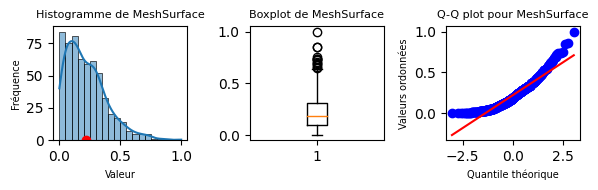

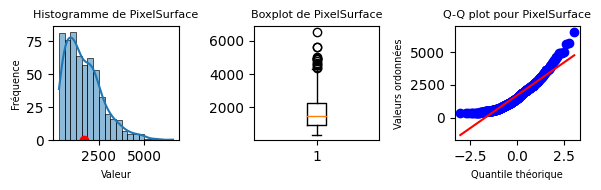

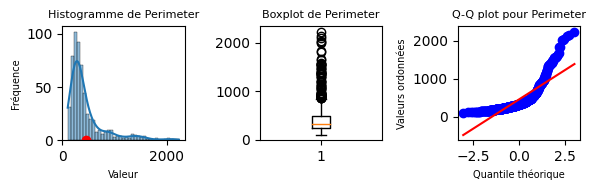

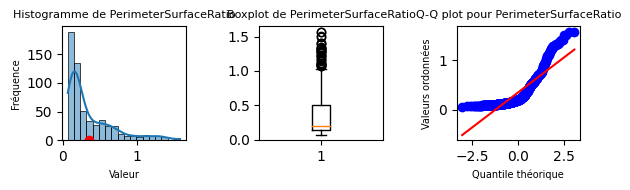

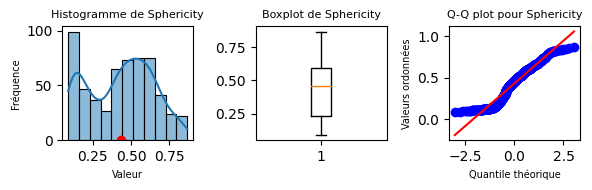

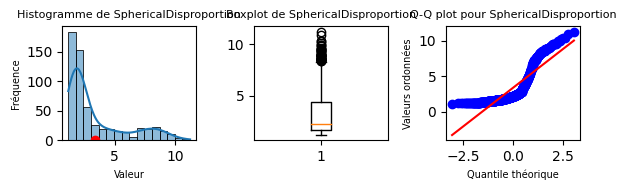

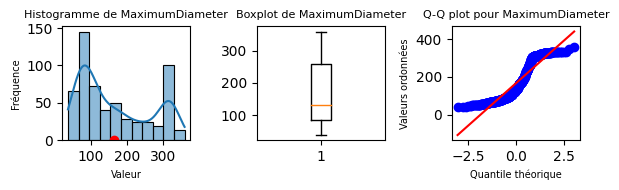

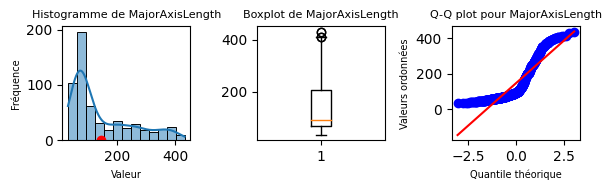

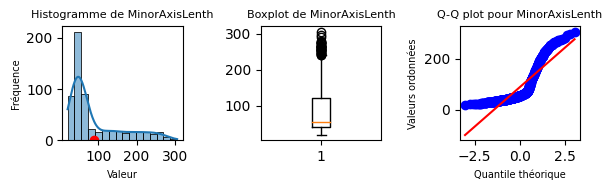

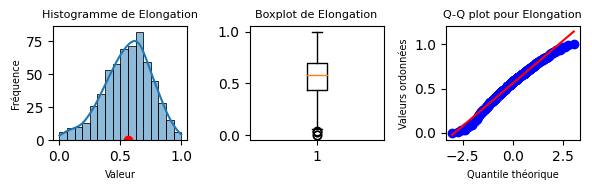

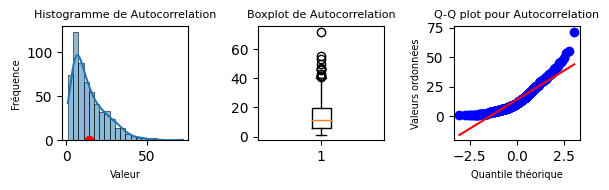

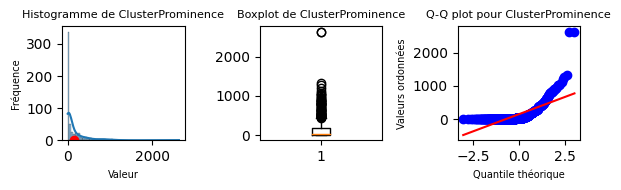

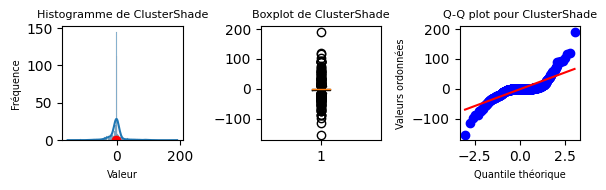

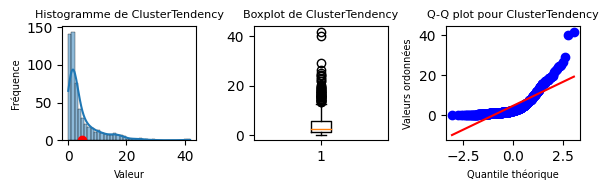

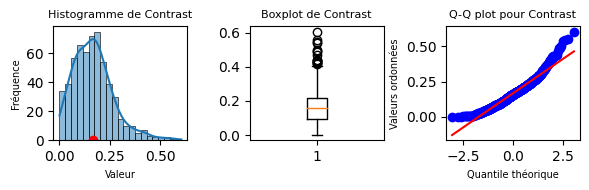

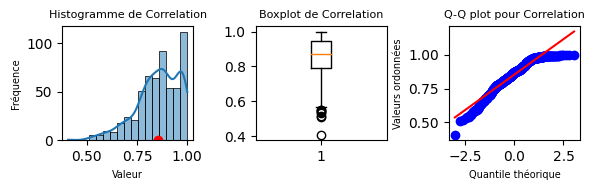

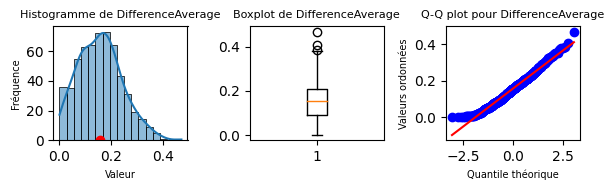

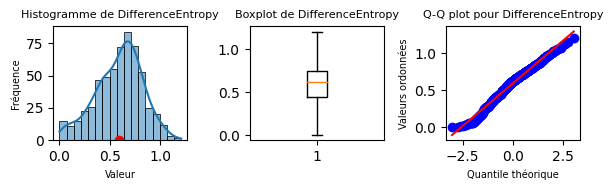

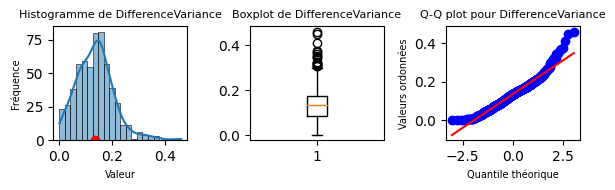

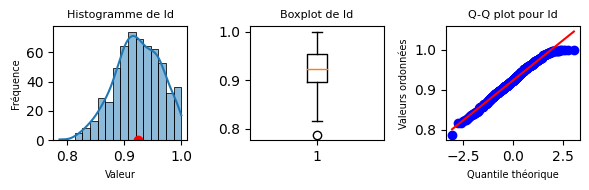

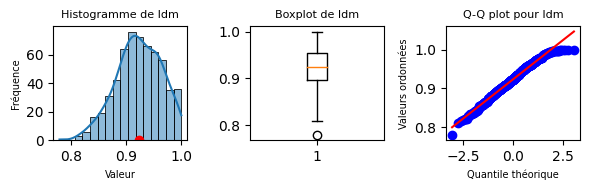

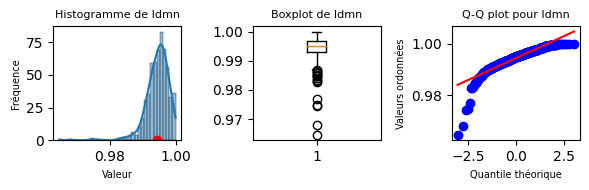

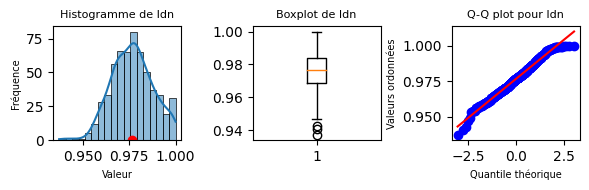

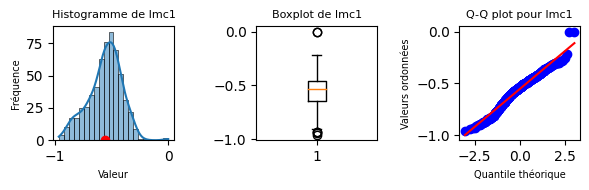

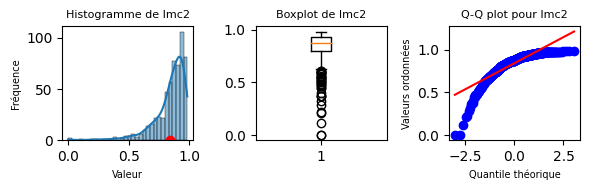

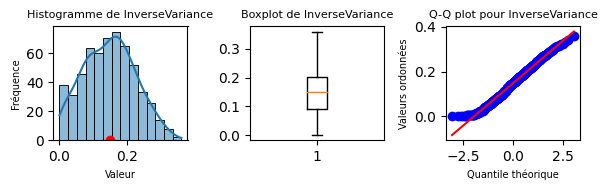

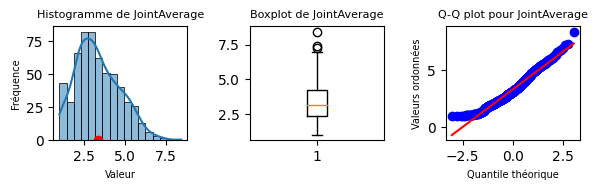

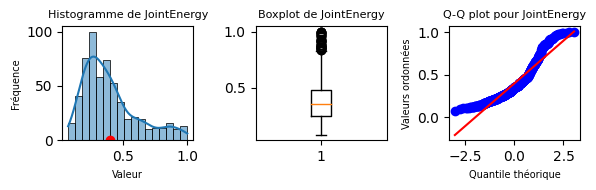

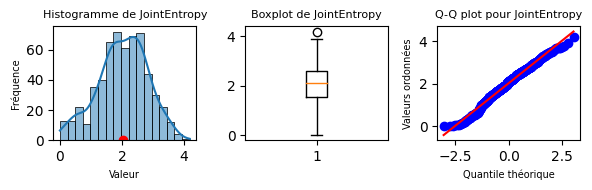

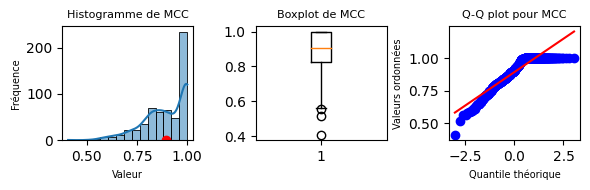

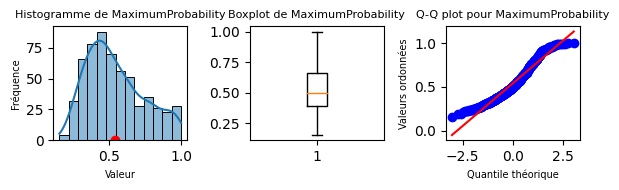

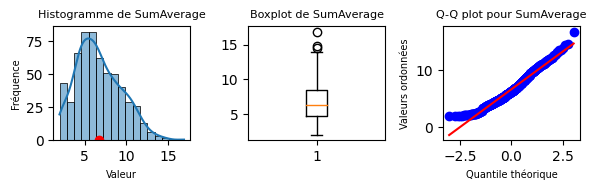

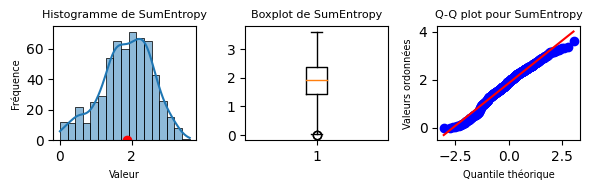

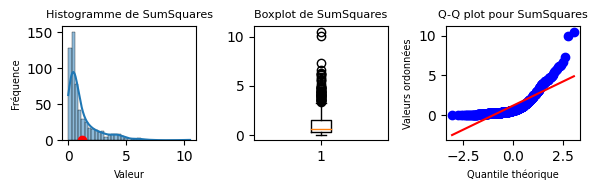

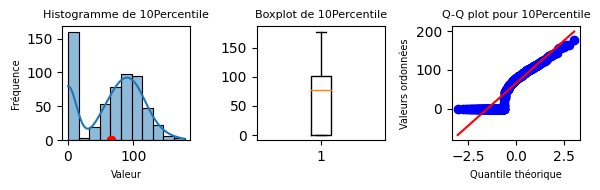

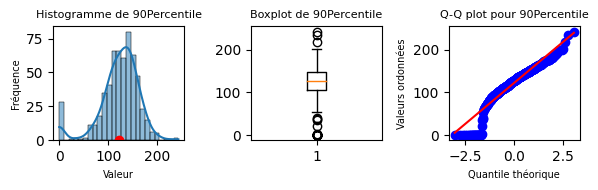

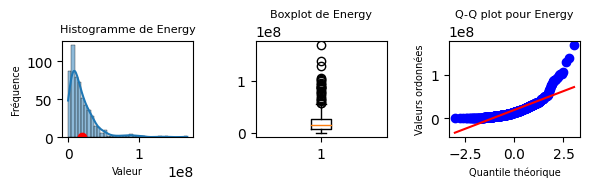

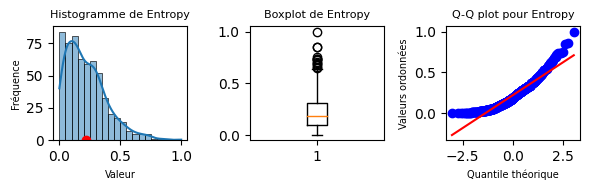

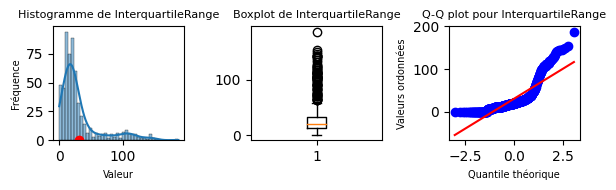

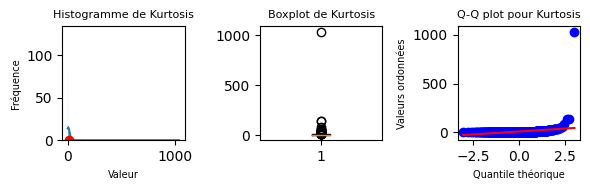

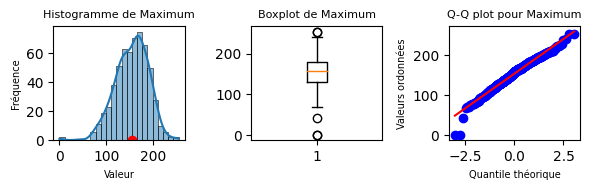

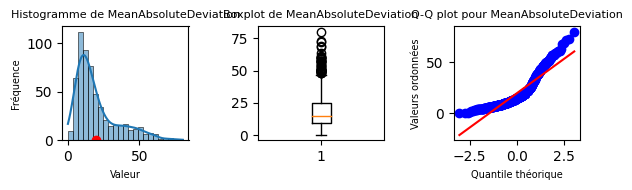

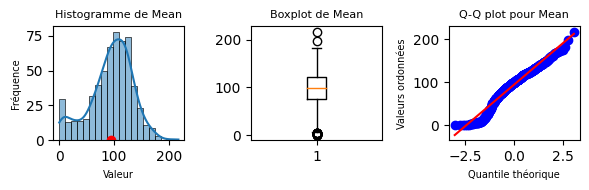

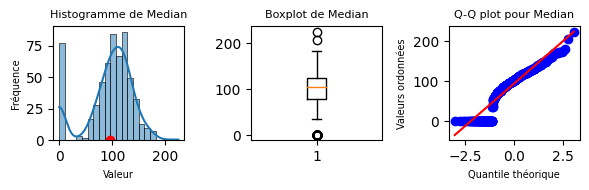

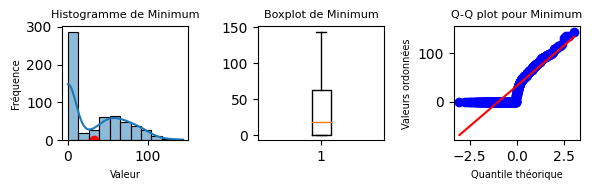

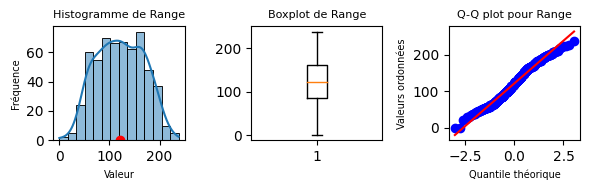

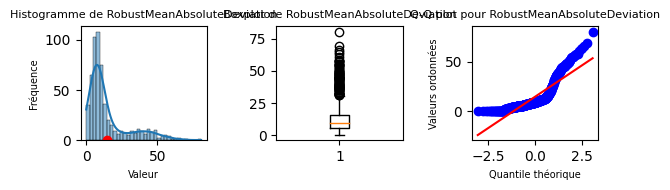

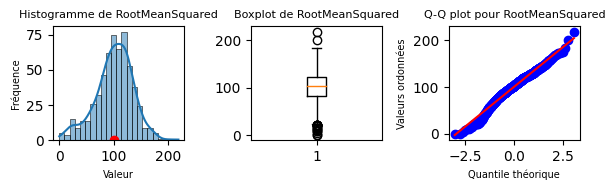

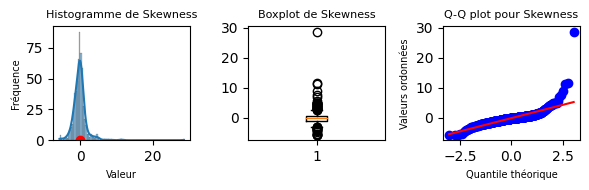

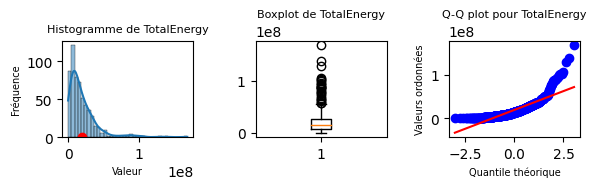

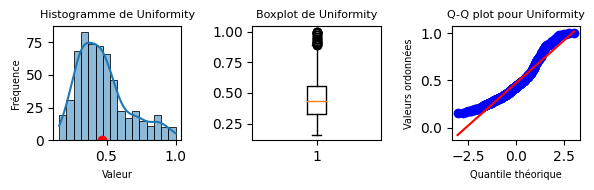

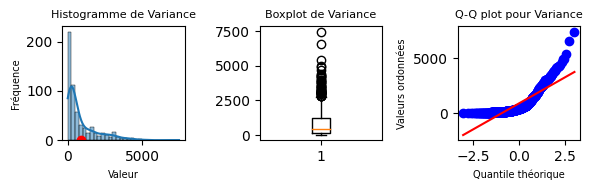

Description dataset complet


MeshSurface PixelSurface   Perimeter PerimeterSurfaceRatio  \
count                 585.0        585.0       585.0                 585.0   
mean               0.221822  1726.358974   450.43961              0.354004   
std                0.166619  1034.724165  360.639463              0.319726   
min                     0.0        339.0  101.740115              0.066495   
25%                0.094646        933.0  240.651804              0.134912   
50%                0.185839       1499.0  324.391919              0.201608   
75%                0.312676       2286.0  485.972655              0.497056   
max                     1.0       6563.0  2236.89567              1.573866   
skewness           1.094549      1.10363    2.296072              1.669332   
kurtosis           4.383115     4.402759    8.546336              5.238562   
excess_kurtosis    1.383115     1.402759    5.546336              2.238562   
shapiro_test            0.0          0.0         0.0                   0.0   
normalite               Non          Non         Non                   Non   

                Sphericity SphericalDisproportion MaximumDiameter  \
count                585.0                  585.0           585.0   
mean              0.432504               3.372908      166.000744   
std               0.209852               2.479368       96.590299   
min               0.088739               1.153183       37.696154   
25%               0.230365               1.677946       83.677954   
50%               0.456797               2.189158      130.942736   
75%               0.595967               4.340936       257.60823   
max               0.867165              11.268996      359.918046   
skewness         -0.075345               1.338672        0.554839   
kurtosis          1.927591               3.459764        1.788009   
excess_kurtosis  -1.072409               0.459764       -1.211991   
shapiro_test           0.0                    0.0             0.0   
normalite              Non                    Non             Non   

                MajorAxisLength MinorAxisLenth Elongation Autocorrelation  \
count                     585.0          585.0      585.0           585.0   
mean                 146.427102      88.745993   0.559813        14.06981   
std                  105.212652      69.847424   0.193221        10.42951   
min                     32.8521      19.514556        0.0             1.0   
25%                     68.5899        42.0515   0.434438        6.116817   
50%                   91.641829      54.637606   0.581227       11.075012   
75%                  205.833779      121.31062   0.697015       19.806487   
max                  432.662145     306.081351        1.0        72.01654   
skewness               1.110597       1.360128  -0.388686        1.305061   
kurtosis               2.965145       3.570317   2.925502        5.148305   
excess_kurtosis       -0.034855       0.570317  -0.074498        2.148305   
shapiro_test                0.0            0.0   0.000087             0.0   
normalite                   Non            Non        Non             Non   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
count                       585.0        585.0           585.0     585.0   
mean                   145.696715    -1.714195        4.646406  0.167352   
std                    273.919318    26.202413        5.667876  0.100039   
min                           0.0  -154.862845             0.0       0.0   
25%                       5.00161    -4.848048        1.131784  0.093083   
50%                     24.713607     -0.18018        2.277056  0.159446   
75%                    178.903716     0.794732        5.861259  0.219093   
max                   2637.192756   191.603312       41.901808    0.6064   
skewness                 3.926479     0.843122        2.358341  0.951541   
kurtosis                27.382511    14.214505       10.320389  4.512803   
excess_kurtosis         24.382511    11.2

In [72]:
describe=fonc_test_normality(dataset.drop('MGMT_value',axis=1))

print("Description dataset complet")
describe

<h3>Analyse sur l'ensemble du dataset, remarques :</h3>

Le jeu de données montre que les les valeurs cibles sont homogènes.

Aucune des variables ne répond au test de Shapiro-Wilk indiquant que les variables explicatives ne suivent pas une loi normale.

Variables ayant un skewness correct : Sphericity, Elongation, Idn, Range,

Variables ayant un bon kurtosis : MajorAxisLength, Elongation, DifferenceAverage, DifferenceEntropy, Idn, JointAverage, SumAverage, Mean,

En analysant les graphiques, variables semblant bonnes sur le Q-Q plot sans trop de valeurs extrêmes : Elongation, DifferenceAverage, DifferenceEntropy, JointEntropy, SumEntropy, Entropy, Maximum, Range

Mais cela ne signifie pas que le dataset soit mauvais, il permet de faire ressortir les variables avec des valeurs extrêmes.

Elongation, Idn et Range semblent être homogènes.

<h3>Mêmes calculs mais que pour les MGMT_value = 1</h3>

In [73]:
describe_MGMT_1=fonc_test_normality(dataset[dataset.MGMT_value == 1].drop('MGMT_value',axis=1),graphic=False)

In [74]:
print("Description du dataset pour MGMT_value = 1")
describe_MGMT_1

Description du dataset pour MGMT_value = 1


MeshSurface PixelSurface   Perimeter PerimeterSurfaceRatio  \
count                 307.0        307.0       307.0                 307.0   
mean               0.223809  1738.925081  458.212649              0.353843   
std                0.162561  1009.474294  367.745804              0.317435   
min                     0.0        339.0  117.740115              0.066495   
25%                0.097977        956.0  244.480231              0.132761   
50%                0.185839       1502.0  325.705627              0.200201   
75%                0.312635       2285.0  516.922402               0.51609   
max                0.848519       5623.0  2236.89567              1.573866   
skewness           0.974054     0.983798    2.261338              1.625918   
kurtosis           3.805118     3.825399    8.418095              5.180216   
excess_kurtosis    0.805118     0.825399    5.418095              2.180216   
shapiro_test            0.0          0.0         0.0                   0.0   
normalite               Non          Non         Non                   Non   

                Sphericity SphericalDisproportion MaximumDiameter  \
count                307.0                  307.0           307.0   
mean              0.435192               3.411276      169.967969   
std               0.219095               2.505799       99.846747   
min               0.096658               1.172299       37.696154   
25%               0.222437               1.663712       84.338977   
50%               0.471329               2.121659      132.034087   
75%               0.601067               4.495658      278.989021   
max               0.853025              10.345787      350.138544   
skewness         -0.037099               1.245755        0.455624   
kurtosis          1.820146               3.211874        1.625066   
excess_kurtosis  -1.179854               0.211874       -1.374934   
shapiro_test           0.0                    0.0             0.0   
normalite              Non                    Non             Non   

                MajorAxisLength MinorAxisLenth Elongation Autocorrelation  \
count                     307.0          307.0      307.0           307.0   
mean                 151.641263      91.762557   0.556355       13.877829   
std                  107.640637      72.572074   0.195966       10.096585   
min                     32.8521      21.643629        0.0             1.0   
25%                   68.269575      41.541962   0.434747        5.952414   
50%                   94.272353      54.685078   0.562609       11.575215   
75%                  236.561478     131.849394   0.697111       19.271491   
max                  413.087191     306.081351        1.0       53.344101   
skewness               0.943434        1.26323  -0.365169         1.15397   
kurtosis               2.535841       3.320733     2.8732        4.160182   
excess_kurtosis       -0.464159       0.320733    -0.1268        1.160182   
shapiro_test                0.0            0.0   0.011152             0.0   
normalite                   Non            Non        Non             Non   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
count                       307.0        307.0           307.0     307.0   
mean                   155.542557    -2.112491        4.938623  0.162568   
std                    253.718023    25.176566        5.867059  0.098797   
min                           0.0  -113.207594             0.0       0.0   
25%                      5.026501    -4.924238         1.11229  0.092018   
50%                     24.661577    -0.240241         2.23812   0.15319   
75%                    198.294651     0.942895         6.43907   0.21329   
max                   1316.710071   118.174463       28.974011  0.554211   
skewness                 2.148534     0.598233        1.734732  0.999993   
kurtosis                 7.446383     9.502181        5.326527  4.553955   
excess_kurtosis          4.446383     6.5

<h3>Comparaison des kurtosis et skewness</h3>

In [75]:
print("complet")
describe.loc[['skewness','excess_kurtosis'],:]

complet


MeshSurface PixelSurface Perimeter PerimeterSurfaceRatio  \
skewness           1.094549      1.10363  2.296072              1.669332   
excess_kurtosis    1.383115     1.402759  5.546336              2.238562   

                Sphericity SphericalDisproportion MaximumDiameter  \
skewness         -0.075345               1.338672        0.554839   
excess_kurtosis  -1.072409               0.459764       -1.211991   

                MajorAxisLength MinorAxisLenth Elongation Autocorrelation  \
skewness               1.110597       1.360128  -0.388686        1.305061   
excess_kurtosis       -0.034855       0.570317  -0.074498        2.148305   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
skewness                 3.926479     0.843122        2.358341  0.951541   
excess_kurtosis         24.382511    11.214505        7.320389  1.512803   

                Correlation DifferenceAverage DifferenceEntropy  \
skewness          -0.833278           0.37307           -0.3454   
excess_kurtosis    0.520636         -0.116294         -0.156441   

                DifferenceVariance        Id       Idm       Idmn       Idn  \
skewness                  0.778428 -0.253134 -0.292844  -2.519363 -0.040854   
excess_kurtosis           1.723191 -0.355641 -0.277191  13.816065 -0.126287   

                     Imc1      Imc2 InverseVariance JointAverage JointEnergy  \
skewness        -0.307544 -2.347259        0.112669     0.505697    1.085668   
excess_kurtosis  0.269881   7.98219       -0.595269    -0.146906    0.493832   

                JointEntropy       MCC MaximumProbability SumAverage  \
skewness           -0.273024 -0.959076           0.560782   0.505697   
excess_kurtosis    -0.218974  0.539886           -0.56394  -0.146906   

                SumEntropy SumSquares 10Percentile 90Percentile    Energy  \
skewness         -0.381271   2.332827    -0.247677    -1.143437  2.773895   
excess_kurtosis  -0.212034   7.159875    -1.102649     2.245069  11.37506   

                  Entropy InterquartileRange    Kurtosis   Maximum  \
skewness         1.094549           1.993352   22.041574 -0.445174   
excess_kurtosis  1.383115           3.502405  510.754063   0.76171   

                MeanAbsoluteDeviation      Mean    Median   Minimum     Range  \
skewness                      1.40668 -0.533925 -0.868048  0.609763  0.010869   
excess_kurtosis              1.423076  0.135992  0.340036 -0.912982 -0.847336   

                RobustMeanAbsoluteDeviation RootMeanSquared   Skewness  \
skewness                           1.698941         -0.4067   5.156418   
excess_kurtosis                    2.180401        0.425621  61.495574   

                TotalEnergy Uniformity  Variance  
skewness           2.773895   0.905472  2.018454  
excess_kurtosis    11.37506   0.280185  4.700848

In [76]:
print("MGMT = 1")
describe_MGMT_1.loc[['skewness','excess_kurtosis'],:]

MGMT = 1


MeshSurface PixelSurface Perimeter PerimeterSurfaceRatio  \
skewness           0.974054     0.983798  2.261338              1.625918   
excess_kurtosis    0.805118     0.825399  5.418095              2.180216   

                Sphericity SphericalDisproportion MaximumDiameter  \
skewness         -0.037099               1.245755        0.455624   
excess_kurtosis  -1.179854               0.211874       -1.374934   

                MajorAxisLength MinorAxisLenth Elongation Autocorrelation  \
skewness               0.943434        1.26323  -0.365169         1.15397   
excess_kurtosis       -0.464159       0.320733    -0.1268        1.160182   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
skewness                 2.148534     0.598233        1.734732  0.999993   
excess_kurtosis          4.446383     6.502181        2.326527  1.553955   

                Correlation DifferenceAverage DifferenceEntropy  \
skewness          -0.830261          0.397533         -0.286206   
excess_kurtosis    0.271653         -0.174376          -0.19488   

                DifferenceVariance        Id       Idm       Idmn       Idn  \
skewness                  0.842002 -0.271405  -0.31136  -2.302702 -0.001917   
excess_kurtosis           1.817463 -0.410775 -0.338137  13.547829 -0.305747   

                     Imc1      Imc2 InverseVariance JointAverage JointEnergy  \
skewness        -0.195094 -2.055784        0.125211     0.449534    1.035189   
excess_kurtosis  0.166062  6.496969       -0.631695    -0.243043    0.291833   

                JointEntropy       MCC MaximumProbability SumAverage  \
skewness           -0.213018 -0.964673           0.543636   0.449534   
excess_kurtosis    -0.310414  0.230523          -0.642217  -0.243043   

                SumEntropy SumSquares 10Percentile 90Percentile    Energy  \
skewness         -0.313303   1.722498    -0.148575    -1.189369  2.396524   
excess_kurtosis  -0.324725   2.289133    -1.187494      2.22043  7.766865   

                  Entropy InterquartileRange   Kurtosis   Maximum  \
skewness         0.974054           1.728409  17.016178 -0.374851   
excess_kurtosis  0.805118           1.875489  292.14413  0.675293   

                MeanAbsoluteDeviation      Mean    Median   Minimum     Range  \
skewness                     1.289715 -0.463188 -0.832079  0.713837  0.001236   
excess_kurtosis              0.644454  0.211762  0.390112 -0.839546 -0.927138   

                RobustMeanAbsoluteDeviation RootMeanSquared  Skewness  \
skewness                            1.50231       -0.350978  6.343787   
excess_kurtosis                    1.033566        0.598147  74.26881   

                TotalEnergy Uniformity  Variance  
skewness           2.396524   0.828875  1.579795  
excess_kurtosis    7.766865    0.02724   1.65138

Certaines variables ont un meilleur skewness avec un MGMT à 1 que par rapport au dataset global et inversement, ces mêmes variables sont donc sensibles au marqueurs. De même le Kurtosis est sensible aussi. Suivant les variables, la corrélation est positive ou négative entre skewness et kurtosis.

In [ ]:
print("Par variable, variation avec MGMT_value=1 par rapport au dataset global")
for col in describe.columns :
    skew = (describe_MGMT_1.loc['skewness',col]*100/describe.loc['skewness',col])-100
    kurt = (describe_MGMT_1.loc['excess_kurtosis',col]*100/describe.loc['excess_kurtosis',col])-100
    print (f"{col:<32} : skewness {skew:>8.2f}%, excess_kurtosis {kurt:>8.2f}%")

Une première conclusion pourrait être qu'un gliocome dont la valeur du MGMT = 0 présenterait des variables contenant plus d'outliers.

Il y a des exceptions avec des variation semblant abbérantes comme l'excess de kurtosis pour la variable MajorAxisLength qui explose avec une augmentation de presque 1232%.

Ces variations pourrait indiquer les variables ayant un impact plus important par rapport à la valeur cible. Par Exemple Sphericity à moins d'outliers avec MGMT_value à 1, une meilleur normalité d'Idn.

In [ ]:
# Comparaison avec MGMT_value = 0
describe_MGMT_0 = fonc_test_normality(dataset[dataset.MGMT_value == 0].drop('MGMT_value',axis=1),graphic=False)
print("Par variable, variation avec MGMT_value=0 par rapport au dataset global")
for col in describe.columns :
    skew = (describe_MGMT_0.loc['skewness',col]*100/describe.loc['skewness',col])-100
    kurt = (describe_MGMT_0.loc['excess_kurtosis',col]*100/describe.loc['excess_kurtosis',col])-100
    print (f"{col:<32} : skewness {skew:>8.2f}%, excess_kurtosis {kurt:>8.2f}%")

<h3>Exemple : comparaison de Sphericity, Entropy, ClusterProminence
afin de vérifier la normalité en fonction de la valeur cible

In [ ]:
print("Sphericity pour MGMT_value=1")
fonc_test_normality(dataset[dataset.MGMT_value == 1][['Sphericity']],graphic=True)      

print("Sphericity pour MGMT_value=0")
fonc_test_normality(dataset[dataset.MGMT_value == 0][['Sphericity']],graphic=True)   

print("Entropy pour MGMT_value=1")
fonc_test_normality(dataset[dataset.MGMT_value == 1][['Entropy']],graphic=True)      

print("Entropy pour MGMT_value=0")
fonc_test_normality(dataset[dataset.MGMT_value == 0][['Entropy']],graphic=True)  

print("ClusterProminence pour MGMT_value=1")
fonc_test_normality(dataset[dataset.MGMT_value == 1][['ClusterProminence']],graphic=True)      

print("ClusterProminence pour MGMT_value=0")
fonc_test_normality(dataset[dataset.MGMT_value == 0][['ClusterProminence']],graphic=True)

<h3>Détection des outliers</h3>
Utilisation du IQR (interquartile range)

In [ ]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)

IQR=q3-q1

outliers = dataset[((dataset<(q1-1.5*IQR)) | (dataset>(q3+1.5*IQR)))]
outliers

outliers_removed = outliers.dropna().reset_index()
print(outliers_removed)

# ----

In [ ]:
# TODO
# On se base sur l'une des variables quantitatives de chaque groupe retourné par la fonction find_highly_correlated_groups avec un seuil
# de 0.7 afin d'avoir une matrice lisible.

sns.pairplot(data=dataset[['MeshSurface', 'Elongation', 'Sphericity', 'Correlation', 'Energy', 'Autocorrelation', 'ClusterProminence', 'Entropy', 'RootMeanSquared', 'Skewness', 'Kurtosis']], diag_kind='kde')
 

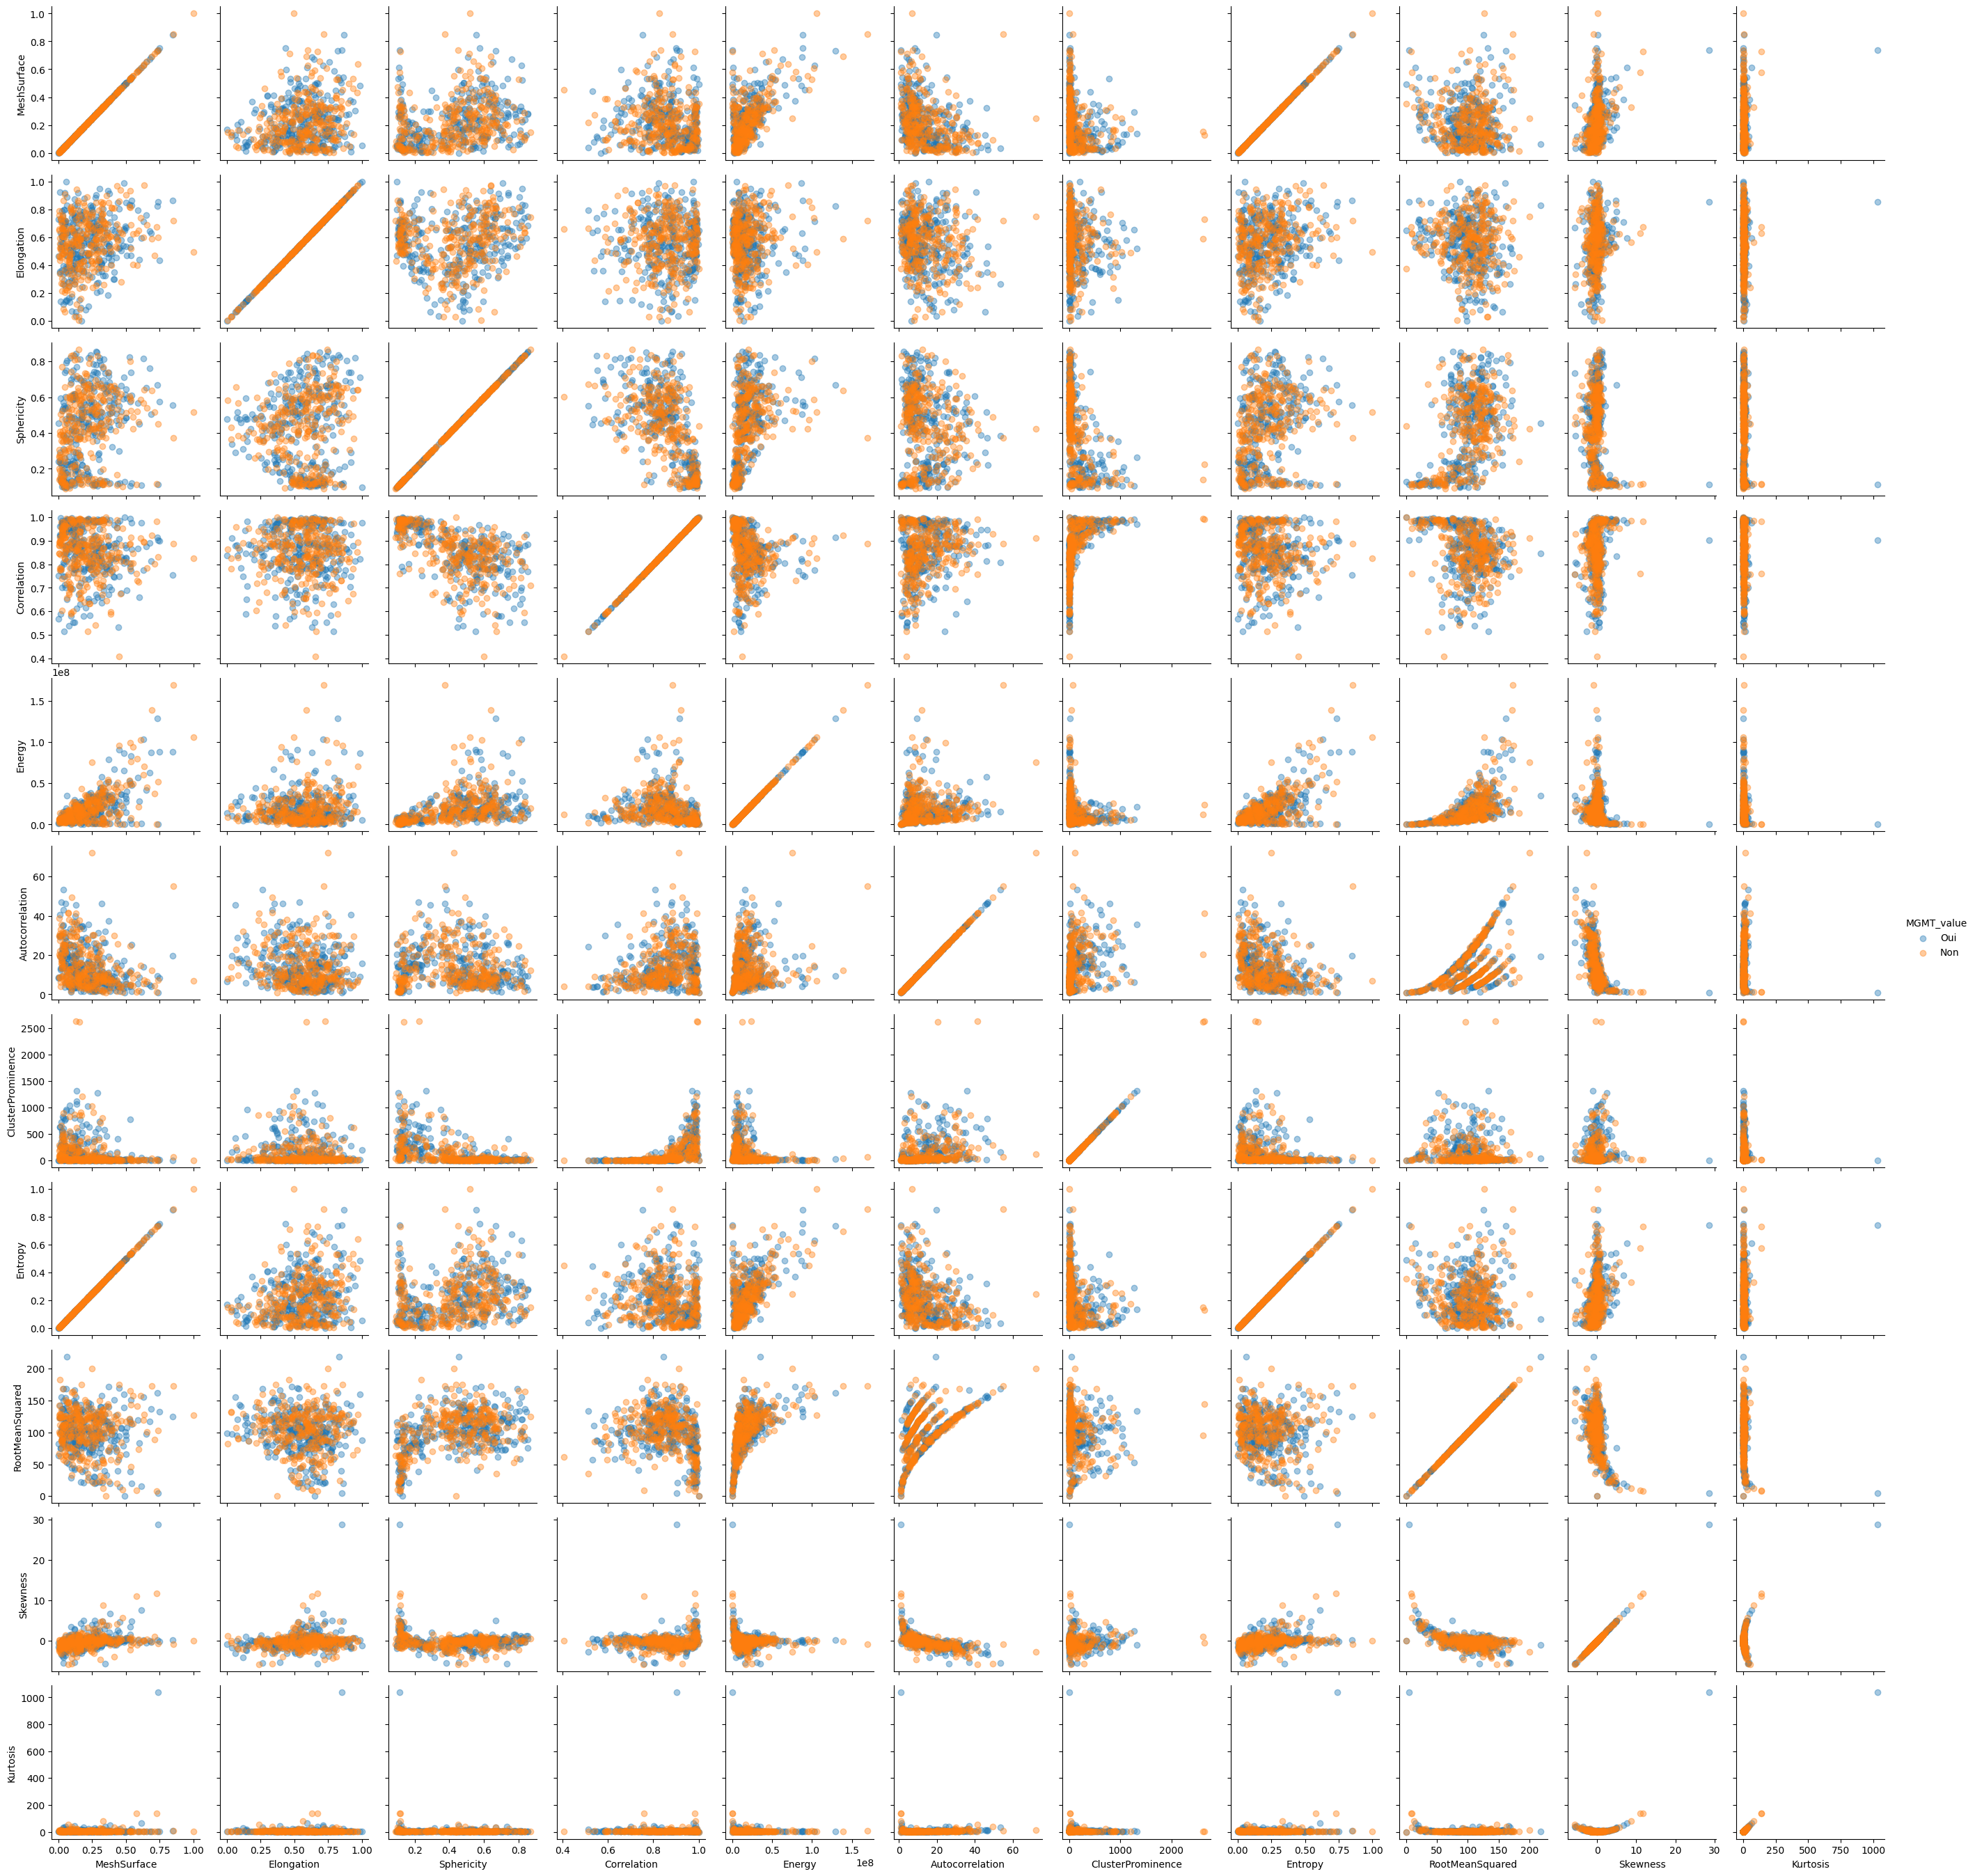

In [77]:
#TODO
# Avec les mêmes colonnes que celles utilisées pour le PairPlot, on réalise un Pair grid en séparant par couleur la variable explicative

df_filtered = dataset[['MGMT_value', 'MeshSurface', 'Elongation', 'Sphericity', 'Correlation', 'Energy', 'Autocorrelation', 'ClusterProminence', 'Entropy', 'RootMeanSquared', 'Skewness', 'Kurtosis']]
df_filtered['MGMT_value'] = df_filtered['MGMT_value'].apply(lambda x: "Oui" if x == 1 else "Non")

g = sns.PairGrid(df_filtered, hue='MGMT_value')
g.map(plt.scatter, alpha=.4)
g.add_legend();

# 🚧 test 3

In [ ]:
!pip install matplotlib

MeshSurface                      : skewness    10.60%, excess_kurtosis    37.33%
PixelSurface                     : skewness    10.46%, excess_kurtosis    36.77%
Perimeter                        : skewness     1.65%, excess_kurtosis     2.27%
PerimeterSurfaceRatio            : skewness     2.71%, excess_kurtosis     2.55%
Sphericity                       : skewness    85.81%, excess_kurtosis   -11.49%
SphericalDisproportion           : skewness     8.05%, excess_kurtosis    65.98%
MaximumDiameter                  : skewness    20.76%, excess_kurtosis   -18.67%
MajorAxisLength                  : skewness    18.44%, excess_kurtosis -1754.60%
MinorAxisLenth                   : skewness     8.21%, excess_kurtosis    52.19%
Elongation                       : skewness     6.41%, excess_kurtosis   -81.26%
Autocorrelation                  : skewness     9.67%, excess_kurtosis    35.20%
ClusterProminence                : skewness    31.60%, excess_kurtosis    48.45%
ClusterShade                     : skewness    23.83%, excess_kurtosis    31.68%
ClusterTendency                  : skewness    36.08%, excess_kurtosis   105.35%
Contrast                         : skewness    -5.30%, excess_kurtosis    -1.71%
Correlation                      : skewness     2.16%, excess_kurtosis    63.42%
DifferenceAverage                : skewness    -9.69%, excess_kurtosis   -37.73%
DifferenceEntropy                : skewness    20.10%, excess_kurtosis   -42.82%
DifferenceVariance               : skewness    -8.46%, excess_kurtosis    -3.92%
Id                               : skewness   -13.34%, excess_kurtosis    -9.83%
Idm                              : skewness   -11.28%, excess_kurtosis   -14.69%
Idmn                             : skewness     0.84%, excess_kurtosis    -7.63%
Idn                              : skewness   -71.54%, excess_kurtosis   -40.69%
Imc1                             : skewness    41.19%, excess_kurtosis    68.27%
Imc2                             : skewness    11.52%, excess_kurtosis    15.82%
InverseVariance                  : skewness   -29.58%, excess_kurtosis    -2.24%
JointAverage                     : skewness    10.37%, excess_kurtosis   -49.45%
JointEnergy                      : skewness     5.35%, excess_kurtosis    49.01%
JointEntropy                     : skewness    24.60%, excess_kurtosis   -53.49%
MCC                              : skewness    -0.55%, excess_kurtosis    55.98%
MaximumProbability               : skewness     3.32%, excess_kurtosis   -16.05%
SumAverage                       : skewness    10.37%, excess_kurtosis   -49.45%
SumEntropy                       : skewness    20.02%, excess_kurtosis   -67.65%
SumSquares                       : skewness    35.75%, excess_kurtosis   105.29%
10Percentile                     : skewness    44.20%, excess_kurtosis   -12.22%
90Percentile                     : skewness    -4.02%, excess_kurtosis     1.11%
Energy                           : skewness     6.95%, excess_kurtosis    11.98%
Entropy                          : skewness    47.87%, excess_kurtosis   -70.16%
InterquartileRange               : skewness    18.80%, excess_kurtosis    87.89%
Kurtosis                         : skewness   -66.52%, excess_kurtosis   -87.55%
Maximum                          : skewness    15.54%, excess_kurtosis     9.56%
MeanAbsoluteDeviation            : skewness     8.57%, excess_kurtosis    83.60%
Mean                             : skewness    16.10%, excess_kurtosis   -24.84%
Median                           : skewness     5.56%, excess_kurtosis    -7.40%
Minimum                          : skewness   -18.25%, excess_kurtosis     4.98%
Range                            : skewness    13.32%, excess_kurtosis   -10.82%
RobustMeanAbsoluteDeviation      : skewness    14.10%, excess_kurtosis    92.15%
RootMeanSquared                  : skewness    16.84%, excess_kurtosis   -32.18%
Skewness                         : skewness   -58.03%, excess_kurtosis   -79.56%
TotalEnergy                      : skewness     6.95%, excess_kurtosis    11.98%
Uniformity                       : skewness     9.75%, excess_kurtosis   110.36%
Variance     

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button


# Assuming you have a DataFrame named 'df' with two columns 'x' and 'y'
# You can replace these with the actual column names from your DataFrame

# Create a new figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign a constant value to the Z-coordinate


colors = ['r' if value == 1 else 'b' for value in dataset['MGMT_value']]


import numpy as np
from sklearn.preprocessing import RobustScaler

# Extract 'Entropy' and 'Elongation' columns from the dataset
entropy_data = dataset['Entropy'].values.reshape(-1, 1)
elongation_data = dataset['Elongation'].values.reshape(-1, 1)

# ⚠️ no senbible au valeur aberante
entropy_scaler = RobustScaler()
elongation_scaler = RobustScaler()

# Fit and transform the data using the scalers
normalized_entropy = entropy_scaler.fit_transform(entropy_data)
normalized_elongation = elongation_scaler.fit_transform(elongation_data)

# Update the dataset with normalized values
new_dataset = dataset
new_dataset['Entropy'] = normalized_entropy
new_dataset['Elongation'] = normalized_elongation
new_dataset['MGMT_value2'] = dataset['MGMT_value']

# Plot the scatter points with constant Z-coordinate
# ⚠️ Separeation add z = new_dataset['MGMT_value2']
z = 0
ax.scatter(new_dataset['Entropy'], new_dataset['Elongation'], z, c=colors)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Scatter Plot in 3D Space')


# Function to update the plot for each frame
def update(frame):
    ax.view_init(elev=30, azim=frame)  # Set the azimuth angle for rotation

# Create the animation
animation = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

ax.set_zscale('linear')  # Set linear scaling for the 'z' axis
ax.zaxis.set_tick_params(labelsize=12)  # Adjust the font size of the 'z' axis labels

# Function to handle zoom button click event
def zoom(event):
    ax.set_xlim(0, 10)  # Set the x-axis limits for zoom
    ax.set_ylim(0, 20)  # Set the y-axis limits for zoom
    ax.set_zlim(0, 30)  # Set the z-axis limits for zoom
    fig.canvas.draw()  # Redraw the figure

# Create a zoom button and position it outside the plot area
zoom_button_ax = plt.axes([0.85, 0.05, 0.1, 0.075])
zoom_button = Button(zoom_button_ax, 'Zoom')
zoom_button.on_clicked(zoom)

# Adjust the figure layout to make space for the zoom button
plt.subplots_adjust(right=0.8)

# Set the appropriate backend for animation
#plt.rcParams['animation.html'] = 'jshtml'  # Use this for Jupyter Notebook
plt.rcParams['animation.html'] = 'html5'  # Use this for other Python environments

# Display the animation
plt.close()  # Close the initial figure to prevent duplicate display
# Show the plot
animation

In [ ]:
#TODO

# Etape 3/ Nettoyage et Pre-processing :

In [ ]:
#TODO

In [ ]:
#TODO

In [ ]:
#TODO